In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Custom Function

In [59]:
def createData(N,lowrange,uprange, beta):
    '''
    Creating Data points X and corresponding outputs Y using SINUSOID FUNCTION
    Input:
        N: No. of data points to be generated 
        
    Output:
        X: np vector of shape (N,)
        Y: np vector of shape (N,)
    '''
    X = np.linspace(lowrange,uprange,num=N)
    mu = 0
    sigma = np.sqrt(1/beta)
    noise = np.random.normal(mu, sigma, N)
    Y = np.sin(X) + noise
    return X, Y

def KernelSExp(sig, l, x1, x2):
    '''
    Generate Squared Exponential Kernel for inputs x1 and x2
    Input:
        sig: scalar
        l: scalar
        x1: scalar data point 1
        x2: scalar data point 2
    Output:
        kse: scalar output of square exponential kernel for x1 and x2
    '''
    kse = (sig**2) * np.exp(-((x1-x2)**2)/(2*l*l))
    return kse

def createKernelMatrix(X,KernelValFunc, sig, l):
    '''
    Creating Kernel Matrix for function data points X a using  KernelFunc
    Input:
        X: Data points -  np vector of shape (N,)
        KernelFunc: The function used to compute kernels
        
    Output:
        K: np matrix of shape (N,N)
    '''
    N = len(X)
    K  = np.zeros((N,N))
    for i in range(N):
        for j in range (N):
            K[i,j] = KernelValFunc(sig, l, X[i], X[j])
    return K

def SampleZeroMeanPrior(K):
    '''
    Generate zero mean sample from a prior
    Input:
        K = COVARIANCE MATRIX - np array of (N,N)
    Output:
        S = a sample from zero mean and K as cov matrix
    '''
    N = len(K)
    mu = np.zeros(N)
    S = np.random.multivariate_normal(mu, K, 1)
    return S

def SamplePosterior(X, Y, K, sigma_likelihood):
    '''
    Generate sample from a Posterior
    Input:
        X = Input data - np array of shape (N,)
        Y = Output - - np array of shape (N,)
        K = COVARIANCE MATRIX - np array of (N,N)
        sigma_likelihood = variance of likelihood noise
    Output:
        S = a sample from posterior
        Mean_Posterior = Mean of the Posterior
    '''
    N = len(K)
    eye = np.identity(N)
    m_eye = (1/(sigma_likelihood**2))*(eye)
    K_inv = np.linalg.inv(K + (0.01*eye))
    Cov_Posterior = np.linalg.inv(K_inv + m_eye)
    Mean_Posterior = Cov_Posterior @ (m_eye @ Y)
    S = np.random.multivariate_normal(Mean_Posterior, Cov_Posterior, 1)
    return Mean_Posterior, S

# GP in Noisy Setting

In [60]:
lowrange = 0
uprange = 4*np.pi
N = 100
sig = 1
l = [0.2, 0.5, 1, 2, 10]
NoSamples = 50
beta = 20
X, Y = createData(N,lowrange,uprange,beta)
Kernels = []
sam_prior = []
sam_posterior = []
mean_post = []
Y_orig = np.sin(X)

#Generating Kernel Matrix for different values of l and appending each to a list
for i in l:
    Kernels.append(createKernelMatrix(X,KernelSExp, sig, i))

# Generate zero mean sample from a priorfor each "l" and appending it to sam_prior
# Computing Mean of Posterior for each "l" and appending it to mean_post
for i in range(len(Kernels)):
    sam_prior.append(SampleZeroMeanPrior(Kernels[i]))
    Mean_Posterior, sample_posterior = SamplePosterior(X, Y, Kernels[i], (1/beta))
    sam_posterior.append(SamplePosterior(X, Y, Kernels[i], (1/beta)))
    sam_posterior.append(sample_posterior)
    mean_post.append(Mean_Posterior)


# Plot for l = 0.2

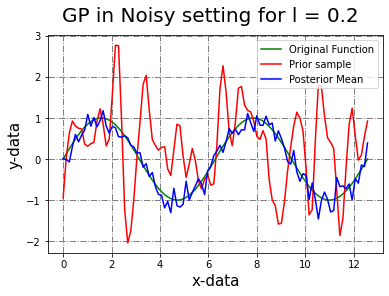

In [66]:

plot1 = plt.figure(1)
plt.plot(X,Y_orig, "g", label = 'Original Function')
plt.plot(X,sam_prior[0].flatten(), "r", label = 'Prior sample')
plt.plot(X,mean_post[0].flatten(), "b", label = 'Posterior Mean')
plt.xlabel('x-data', fontsize=15)
plt.ylabel('y-data', fontsize=15)
plt.suptitle('GP in Noisy setting for l = 0.2', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.legend()
plt.show()

# Plot for l = 0.5

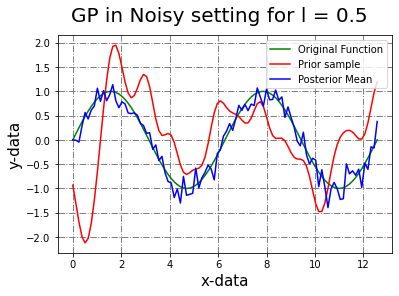

In [67]:
plot1 = plt.figure(1)
plt.plot(X,Y_orig, "g", label = 'Original Function')
plt.plot(X,sam_prior[1].flatten(), "r", label = 'Prior sample')
plt.plot(X,mean_post[1].flatten(), "b", label = 'Posterior Mean')
plt.xlabel('x-data', fontsize=15)
plt.ylabel('y-data', fontsize=15)
plt.suptitle('GP in Noisy setting for l = 0.5', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.legend()
plt.show()

# Plot for l = 1

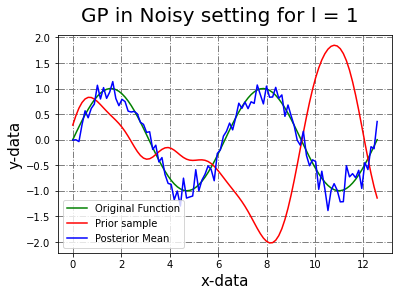

In [68]:
plot1 = plt.figure(1)
plt.plot(X,Y_orig, "g", label = 'Original Function')
plt.plot(X,sam_prior[2].flatten(), "r", label = 'Prior sample')
plt.plot(X,mean_post[2].flatten(), "b", label = 'Posterior Mean')
plt.xlabel('x-data', fontsize=15)
plt.ylabel('y-data', fontsize=15)
plt.suptitle('GP in Noisy setting for l = 1', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.legend()
plt.show()

# Plot for l = 2

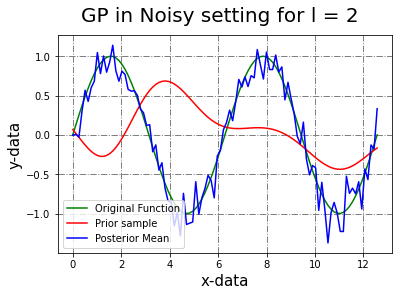

In [69]:
plot1 = plt.figure(1)
plt.plot(X,Y_orig, "g", label = 'Original Function')
plt.plot(X,sam_prior[3].flatten(), "r", label = 'Prior sample')
plt.plot(X,mean_post[3].flatten(), "b", label = 'Posterior Mean')
plt.xlabel('x-data', fontsize=15)
plt.ylabel('y-data', fontsize=15)
plt.suptitle('GP in Noisy setting for l = 2', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.legend()
plt.show()

# Plot for l = 10

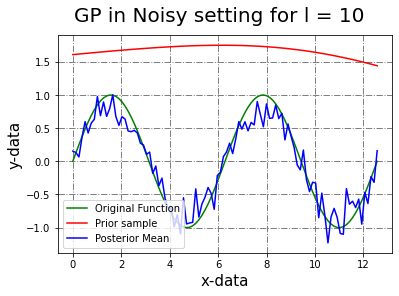

In [70]:
plot1 = plt.figure(1)
plt.plot(X,Y_orig, "g", label = 'Original Function')
plt.plot(X,sam_prior[4].flatten(), "r", label = 'Prior sample')
plt.plot(X,mean_post[4].flatten(), "b", label = 'Posterior Mean')
plt.xlabel('x-data', fontsize=15)
plt.ylabel('y-data', fontsize=15)
plt.suptitle('GP in Noisy setting for l = 10', fontsize=20)
plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")
plt.legend()
plt.show()